In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib
import numpy as np
import statistics
from scipy import stats



def my_func(x):
    s = math.sqrt(x)
    return s

def my_func_verbose(x):
    s = math.sqrt(x)
    print("Task", multiprocessing.current_process(), x, s)
    return s

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    with multiprocessing.get_context('fork').Pool(processes=pool_size) as pool:
        print(data, pool_size)
        tp1 = time.time()
        result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
        pool.close() # No more processes
        pool.join()  # Wait for the pool processing to complete. 
        print("Results", result)
        totalt = (time.time()-tp1)
        print("Overall Time:", int(totalt))
        return result, totalt


def check_prime(num):
    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(2,num):
            if (num % i) == 0:
                print(num,"is not a prime number")
                print(i,"times",num//i,"is",num)
                print("Time:", int(time.time()-t1))
                t = (time.time()-t1)    # elapsed time saved to variable
                break
        else:
            print(num,"is a prime number")
            print("Time:", time.time()-t1) 
            t = (time.time()-t1)        # elapsed time saved to variable
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    return [res, t]


In [2]:
# Creating an array of large prime numbers to use for timing execution of check_prime function
primes = []
with open('primes2.txt') as f:   # file containing primes between 15,485,867 and 32,452,843
    for line in f:
        primes.extend([int(item) for item in line.split()])

<b>Firstly, let us create a test that will look at the running time of a data set. The length of this data set is increased by 1 prime number with each loop, starting with length 2 up to length 21. </b>

In [6]:
test_speedup = []
test_numprocesses = []
test_time1 = []
test_time2 = []

for i in range(2, 21):
#   initial look at the speedup, with number of processed from 2 to 10
    print("Number of processes to execute:" + str(i))
    test_numprocesses.append(i)
    
#   data ranges from the 1st element of the primes list, to the ith element
    dataRange = primes[0:i]
    
#   coresx1 creates a pool of processes to be executed by 1 core; coresx2 by 2 cores.
    coresx1 = pool_process(check_prime, dataRange, 1)
    coresx2 = pool_process(check_prime, dataRange, 2)
    
#   lists to store the respective running times returned by the multiprocessing calls above
    test_time1.append(coresx1[1])
    test_time2.append(coresx2[1])
#   speedup is calculated as the Time with 1 core / Time with 2 cores (coefficient)
    test_speedup.append(coresx1[1]/coresx2[1])
    print()

Number of processes to execute:2
[15485867, 15485917] 1
15485867 is a prime number
Time: 1.5638859272003174
15485917 is a prime number
Time: 1.5946190357208252
Results [[True, 1.5808658599853516], [True, 1.6246368885040283]]
Overall Time: 3
[15485867, 15485917] 2
15485917 15485867 is a prime numberis a prime number
Time:
 Time:1.7527601718902588 
1.769665002822876
Results [[True, 1.8315448760986328], [True, 1.802171230316162]]
Overall Time: 1

Number of processes to execute:3
[15485867, 15485917, 15485927] 1
15485867 is a prime number
Time: 1.657243013381958
15485917 is a prime number
Time: 1.6443650722503662
15485927 is a prime number
Time: 1.535524845123291
Results [[True, 1.6949000358581543], [True, 1.682291030883789], [True, 1.5630569458007812]]
Overall Time: 4
[15485867, 15485917, 15485927] 2
15485867 is a prime number15485917
 Time:is a prime number 
1.7077569961547852Time:
 1.7385120391845703
15485927 is a prime number
Time: 1.5917840003967285
Results [[True, 1.7484939098358154]

Time: 1.7783169746398926
15485989 is a prime number
Time: 1.8444201946258545
15485959 is a prime number
Time: 1.8564229011535645
15485993 is a prime number
Time: 1.857712984085083
15486013 is a prime number
Time: 1.7578649520874023
15486047 is a prime number
Time: 1.7403409481048584
15486041 is a prime number
Time: 2.1700620651245117
15486059 is a prime number
Time: 2.2900679111480713
15486071 is a prime number
Time: 1.7746031284332275
Results [[True, 1.714813232421875], [True, 1.7406787872314453], [True, 1.743095874786377], [True, 1.7278892993927002], [True, 1.804729700088501], [True, 1.8805906772613525], [True, 1.8724942207336426], [True, 1.8780207633972168], [True, 1.7803938388824463], [True, 2.2128520011901855], [True, 1.7574970722198486], [True, 2.352567672729492], [True, 1.8272678852081299]]
Overall Time: 12

Number of processes to execute:14
[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101

15486047 is a prime number
Time: 1.5731289386749268
15486059 is a prime number
Time: 1.5908238887786865
15486071 is a prime number
Time: 1.5555520057678223
15486101 is a prime number
Time: 1.6314988136291504
15486139 is a prime number
Time: 1.517469882965088
15486157 is a prime number
Time: 1.5910120010375977
15486173 is a prime number
Time: 1.615818977355957
15486181 is a prime number
Time: 1.5482449531555176
15486193 is a prime number
Time: 1.5328898429870605
Results [[True, 1.6061859130859375], [True, 1.5873870849609375], [True, 1.5932648181915283], [True, 1.5666389465332031], [True, 1.5882670879364014], [True, 1.670957088470459], [True, 1.5677928924560547], [True, 1.573028802871704], [True, 1.6310460567474365], [True, 1.6319348812103271], [True, 1.600663185119629], [True, 1.6103947162628174], [True, 1.5884108543395996], [True, 1.6511616706848145], [True, 1.5581059455871582], [True, 1.6181471347808838], [True, 1.6506731510162354], [True, 1.5668511390686035], [True, 1.550559997558593

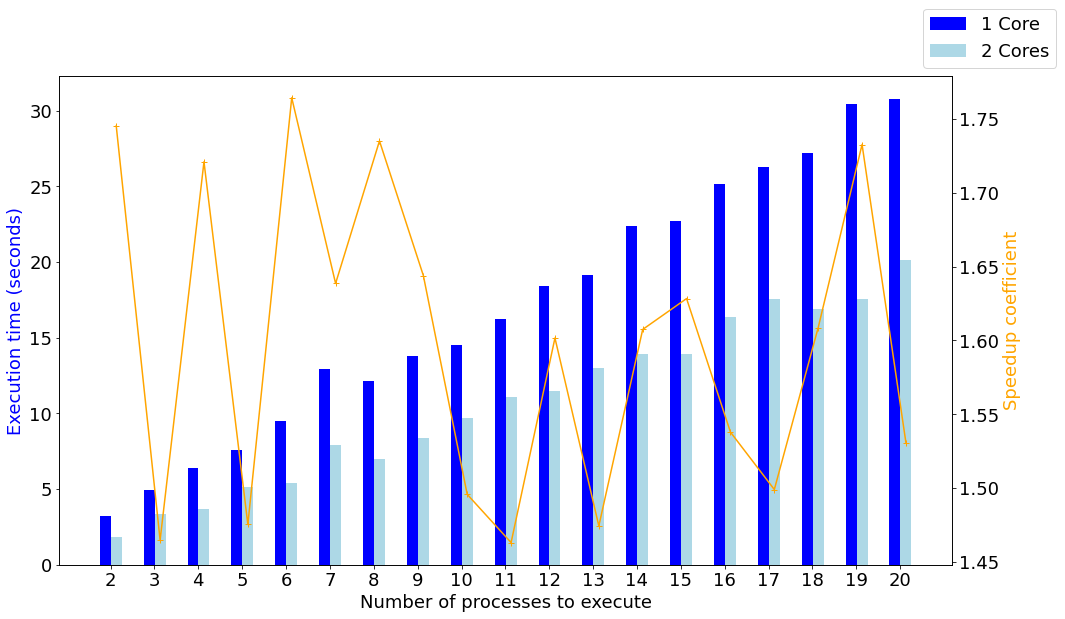

In [7]:
# BARPLOTS
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [16,9]
N = len(test_numprocesses)
fig, ax1 = plt.subplots()
y1 = [test_time1, test_time2]
X = np.arange(N)
y2 = test_speedup
ax2 = ax1.twinx()
ax1.bar(X+0.0, y1[0], width=0.25, color='blue')
ax1.bar(X+0.25, y1[1], width = 0.25, color='lightblue')
plt.xticks([i+0.12 for i in range(N)], test_numprocesses)
fig.legend(labels=['1 Core', '2 Cores'])

ax2.plot(X+0.25, y2, marker="+", color='orange')

ax1.set_xlabel('Number of processes to execute')
ax1.set_ylabel('Execution time (seconds)', color='b')
ax2.set_ylabel('Speedup coefficient', color='orange')

plt.savefig('barplots-and-speedup-checkprime-test.png')
plt.show()

In [ ]:
print(f'The mean speedup time is found to be {statistics.mean(test_speedup):.2f} times faster with 2 cores than with 1, and a standard deviation of {statistics.stdev(test_speedup):.3g}.')
print(f'The max speedup time is {max(test_speedup):.3g} times faster with 2 cores than with 1.')
print(f'The min speedup time is {min(test_speedup):.3g} times faster with 2 cores than with 1.')
print(f'The range of the values is {max(test_speedup)-min(test_speedup):.3g}')

In [10]:
speedup = []
numprocesses = []
time1 = []
time2 = []

for i in range(2, 41, 2):
#    dataset increasing from 2 to 40 in steps of 2 
    print("Number of processes to execute:" + str(i))
    numprocesses.append(i)
    dataRange = primes[0:i]
    coresx1 = pool_process(check_prime, dataRange, 1)
    coresx2 = pool_process(check_prime, dataRange, 2)
    time1.append(coresx1[1])
    time2.append(coresx2[1])
    speedup.append(coresx1[1]/coresx2[1])
    print()

Number of processes to execute:2
[15485867, 15485917] 1
15485867 is a prime number
Time: 1.61625075340271
15485917 is a prime number
Time: 1.5804519653320312
Results [[True, 1.678999662399292], [True, 1.6053569316864014]]
Overall Time: 3
[15485867, 15485917] 2
15485917 is a prime number
Time:15485867  1.7887248992919922is a prime number

Time: 1.8593590259552002
Results [[True, 1.902946949005127], [True, 1.8486018180847168]]
Overall Time: 1

Number of processes to execute:4
[15485867, 15485917, 15485927, 15485933] 1
15485867 is a prime number
Time: 1.5868308544158936
15485917 is a prime number
Time: 1.5013699531555176
15485927 is a prime number
Time: 1.4927222728729248
15485933 is a prime number
Time: 1.5035121440887451
Results [[True, 1.6112709045410156], [True, 1.5357248783111572], [True, 1.5131683349609375], [True, 1.5299761295318604]]
Overall Time: 6
[15485867, 15485917, 15485927, 15485933] 2
15485867 is a prime number
Time: 1.9012353420257568
15485917 is a prime number
Time: 2.008

15485867 is a prime number
Time: 1.5005929470062256
15485917 is a prime number
Time: 1.4782803058624268
15485927 is a prime number
Time: 1.5430610179901123
15485933 is a prime number
Time: 1.5214102268218994
15485941 is a prime number
Time: 1.65559983253479
15485959 is a prime number
Time: 1.4922881126403809
15485989 is a prime number
Time: 1.4945189952850342
15485993 is a prime number
Time: 1.5290207862854004
15486013 is a prime number
Time: 1.441662073135376
15486041 is a prime number
Time: 1.4730517864227295
15486047 is a prime number
Time: 1.445185661315918
15486059 is a prime number
Time: 1.4347310066223145
15486071 is a prime number
Time: 1.4838628768920898
15486101 is a prime number
Time: 1.4368340969085693
Results [[True, 1.5202250480651855], [True, 1.4987950325012207], [True, 1.5753862857818604], [True, 1.5528242588043213], [True, 1.6864190101623535], [True, 1.5097858905792236], [True, 1.5200278759002686], [True, 1.5599019527435303], [True, 1.4617862701416016], [True, 1.488694

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209] 1
15485867 is a prime number
Time: 1.4276740550994873
15485917 is a prime number
Time: 1.435791254043579
15485927 is a prime number
Time: 1.3946762084960938
15485933 is a prime number
Time: 1.4031341075897217
15485941 is a prime number
Time: 1.4015727043151855
15485959 is a prime number
Time: 1.4320659637451172
15485989 is a prime number
Time: 1.4198720455169678
15485993 is a prime number
Time: 1.4355719089508057
15486013 is a prime number
Time: 1.5294342041015625
15486041 is a prime number
Time: 1.4162070751190186
15486047 is a prime number
Time: 1.427767038345337
15486059 is a prime number
Time: 1.420426845550537
15486071 is a prime number
Time: 1.754291296005249
15486101 is a prime number
Time: 1.5614657402038574
15486139 is a prime number
Time: 1.5861592292785645
15486157 is a prime n

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209, 15486221, 15486227, 15486241, 15486257, 15486259, 15486277, 15486281, 15486283] 1
15485867 is a prime number
Time: 1.4053080081939697
15485917 is a prime number
Time: 1.3991789817810059
15485927 is a prime number
Time: 1.4102602005004883
15485933 is a prime number
Time: 1.447749137878418
15485941 is a prime number
Time: 1.5158438682556152
15485959 is a prime number
Time: 1.417658805847168
15485989 is a prime number
Time: 1.5618770122528076
15485993 is a prime number
Time: 1.40339994430542
15486013 is a prime number
Time: 1.4131128787994385
15486041 is a prime number
Time: 1.4096438884735107
15486047 is a prime number
Time: 1.3955180644989014
15486059 is a prime number
Time: 1.4268221855163574
15486071 is a prime number
Time: 1.4017531871795654
15486101 is a prime number
Time: 1.3924851417

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209, 15486221, 15486227, 15486241, 15486257, 15486259, 15486277, 15486281, 15486283, 15486287, 15486347, 15486421, 15486433, 15486437, 15486451] 1
15485867 is a prime number
Time: 1.4119422435760498
15485917 is a prime number
Time: 1.449934959411621
15485927 is a prime number
Time: 1.418097734451294
15485933 is a prime number
Time: 1.726294755935669
15485941 is a prime number
Time: 1.932924747467041
15485959 is a prime number
Time: 1.929051160812378
15485989 is a prime number
Time: 1.621516227722168
15485993 is a prime number
Time: 1.595653772354126
15486013 is a prime number
Time: 1.9580540657043457
15486041 is a prime number
Time: 1.7721540927886963
15486047 is a prime number
Time: 1.5719490051269531
15486059 is a prime number
Time: 2.7007572650909424
15486071 is a prime number
Time: 1.58536

15485959 is a prime number
Time:15485867  1.5682899951934814is a prime number

Time: 1.594162940979004
15485989 is a prime number
Time: 1.6045610904693604
15485917 is a prime number
Time: 1.668233871459961
15485993 is a prime number
Time: 1.6140751838684082
15485927 is a prime number
Time: 1.6159169673919678
15486013 is a prime number
Time: 1.9700541496276855
15485933 is a prime number
Time: 2.0570549964904785
15486041 is a prime number
Time: 2.0546669960021973
15485941 is a prime number
Time: 2.0389010906219482
15486047 is a prime number
Time: 1.8548197746276855
15486157 is a prime number
Time: 2.0263140201568604
15486059 is a prime number
Time: 3.2334530353546143
15486173 is a prime number
Time: 2.9986319541931152
15486181 is a prime number
Time:15486071  2.530547857284546
is a prime number
Time: 2.6548516750335693
15486101 is a prime number
Time: 7.261637210845947
15486193 is a prime number
Time: 7.59723687171936
15486139 is a prime number
Time: 4.390093803405762
15486209 is a prime

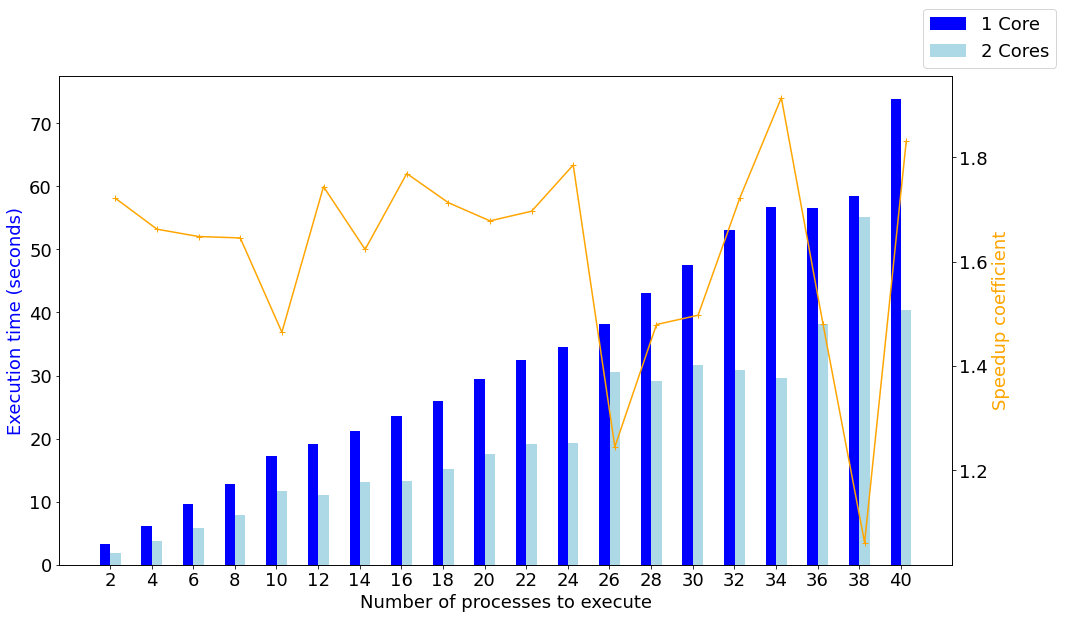

In [11]:
# BARPLOTS
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [16,9]
N = len(numprocesses)
fig, ax1 = plt.subplots()
y1 = [time1, time2]
X = np.arange(N)
y2 = speedup
ax2 = ax1.twinx()
ax1.bar(X+0.0, y1[0], width=0.25, color='blue')
ax1.bar(X+0.25, y1[1], width = 0.25, color='lightblue')
plt.xticks([i+0.12 for i in range(N)], numprocesses)
fig.legend(labels=['1 Core', '2 Cores'])

ax2.plot(X+0.25, y2, marker="+", color='orange')

ax1.set_xlabel('Number of processes to execute')
ax1.set_ylabel('Execution time (seconds)', color='b')
ax2.set_ylabel('Speedup coefficient', color='orange')

plt.savefig('barplots-and-speedup-checkprime1.png')
plt.show()

In [12]:
print(f'The mean speedup time is found to be {statistics.mean(speedup):.3g} times faster with 2 cores than with 1, and a standard deviation of {statistics.stdev(speedup):.3g}.')
print(f'The max speedup time is {max(speedup):.3g} times faster with 2 cores than with 1.')
print(f'The min speedup time is {min(speedup):.3g} times faster with 2 cores than with 1.')
print(f'The range of the values is {max(speedup)-min(speedup):.3g}')

The mean speedup time is found to be 1.62 times faster with 2 cores than with 1, and a standard deviation of 0.201.
The max speedup time is 1.91 times faster with 2 cores than with 1.
The min speedup time is 1.06 times faster with 2 cores than with 1.
The range of the values is 0.852


<b>Task 2: An alternative processing task that will also test the CPU</b>

In [20]:
def sleep(seconds):
    print(f'Sleeping {seconds} second(s)')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'

<li>Test 1: Even and odd number of sleep processes. 

In [31]:
speedup2 = []
numprocesses2 = []
dataRange2 = [1]  # start with 1 function call/processes to execute with initial argument: 1 second
time1_2 = []
time2_2 = []

for _ in range(11):
    numprocesses2.append(len(dataRange2))
    print("Number of processes to execute: " + str(len(dataRange2)))
    coresx1_2 = pool_process(sleep, dataRange2, 1)
    coresx2_2 = pool_process(sleep, dataRange2, 2)
    time1_2.append(coresx1_2[1])
    time2_2.append(coresx2_2[1])
    speedup2.append(coresx1_2[1]/coresx2_2[1])
    dataRange2.append(dataRange2[-1]+1)   # insert 1 additional function calls/processes to be executed
    print()

Number of processes to execute: 1
Sleeping 1 second(s)
[1] 1
Results ['Done Sleeping...1']
Overall Time: 1
Sleeping 1 second(s)
[1] 2
Results ['Done Sleeping...1']
Overall Time: 1

Number of processes to execute: 2
Sleeping 1 second(s)
[1, 2] 1
Sleeping 2 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...2']
Overall Time: 3
Sleeping 1 second(s)Sleeping 2 second(s)

[1, 2] 2
Results ['Done Sleeping...1', 'Done Sleeping...2']
Overall Time: 2

Number of processes to execute: 3
Sleeping 1 second(s)
[1, 2, 3] 1
Sleeping 2 second(s)
Sleeping 3 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...3']
Overall Time: 6
Sleeping 1 second(s)Sleeping 2 second(s)

[1, 2, 3] 2
Sleeping 3 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...3']
Overall Time: 4

Number of processes to execute: 4
Sleeping 1 second(s)
[1, 2, 3, 4] 1
Sleeping 2 second(s)
Sleeping 3 second(s)
Sleeping 4 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...2', 'Do

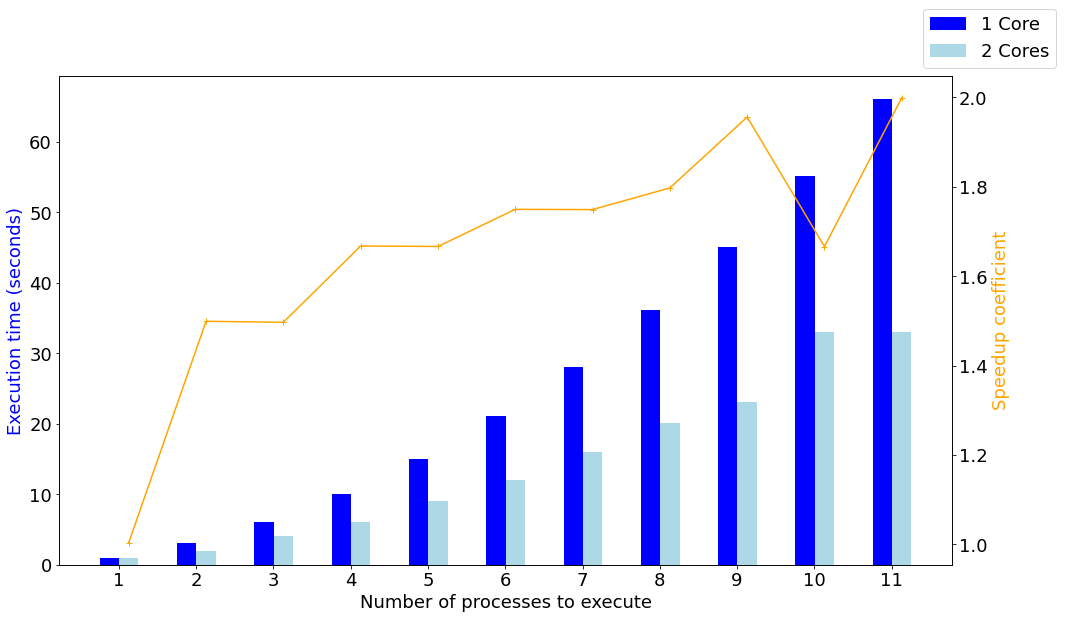

In [32]:
# BARPLOTS
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [16,9]
N = len(numprocesses2)
fig, ax1 = plt.subplots()
y1 = [time1_2, time2_2]
X = np.arange(N)
y2 = speedup2
ax2 = ax1.twinx()
ax1.bar(X+0.0, y1[0], width=0.25, color='blue')
ax1.bar(X+0.25, y1[1], width = 0.25, color='lightblue')
plt.xticks([i+0.12 for i in range(N)], numprocesses2)
fig.legend(labels=['1 Core', '2 Cores'])

ax2.plot(X+0.25, y2, marker="+", color='orange')
5
ax1.set_xlabel('Number of processes to execute')
ax1.set_ylabel('Execution time (seconds)', color='b')
ax2.set_ylabel('Speedup coefficient', color='orange')

plt.savefig('barplots-and-speedup-sleepfunc.png')
plt.show()

In [25]:
print(f'The mean speedup time is found to be {statistics.mean(speedup2):.3g} times faster with 2 cores than with 1, and a standard deviation of {statistics.stdev(speedup2):.3g}.')
print(f'The max speedup time is {max(speedup2):.3g} times faster with 2 cores than with 1.')
print(f'The min speedup time is {min(speedup2):.3g} times faster with 2 cores than with 1.')
print(f'The range of the values is {max(speedup2)-min(speedup2):.3g}')

The mean speedup time is found to be 1.8 times faster with 2 cores than with 1, and a standard deviation of 0.17.
The max speedup time is 2 times faster with 2 cores than with 1.
The min speedup time is 1.33 times faster with 2 cores than with 1.
The range of the values is 0.665


In [40]:
speedup3 = []
numprocesses3 = []
dataRange3 = [1, 1]  # start with 2 function calls/processes to execute 
time1_3 = []
time2_3 = []

for _ in range(6):
    print("Number of processes to execute: " + str(len(dataRange3)))
    numprocesses3.append(len(dataRange3))
    coresx1_2 = pool_process(sleep, dataRange3, 1)
    coresx2_2 = pool_process(sleep, dataRange3, 2)
    time1_3.append(coresx1_2[1])
    time2_3.append(coresx2_2[1])
    speedup3.append(coresx1_2[1]/coresx2_2[1])
    dataRange3.append(dataRange3[-1]+1)   # insert now 2 additional function calls/processes to be executed
    dataRange3.append(dataRange3[-1])  

Number of processes to execute: 2
Sleeping 1 second(s)
[1, 1] 1
Sleeping 1 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1']
Overall Time: 2
Sleeping 1 second(s)Sleeping 1 second(s)

[1, 1] 2
Results ['Done Sleeping...1', 'Done Sleeping...1']
Overall Time: 1
Number of processes to execute: 4
Sleeping 1 second(s)
[1, 1, 2, 2] 1
Sleeping 1 second(s)
Sleeping 2 second(s)
Sleeping 2 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2']
Overall Time: 6
Sleeping 1 second(s)Sleeping 1 second(s)

[1, 1, 2, 2] 2
Sleeping 2 second(s)Sleeping 2 second(s)

Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2']
Overall Time: 3
Number of processes to execute: 6
Sleeping 1 second(s)
[1, 1, 2, 2, 3, 3] 1
Sleeping 1 second(s)
Sleeping 2 second(s)
Sleeping 2 second(s)
Sleeping 3 second(s)
Sleeping 3 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2', 'Done 

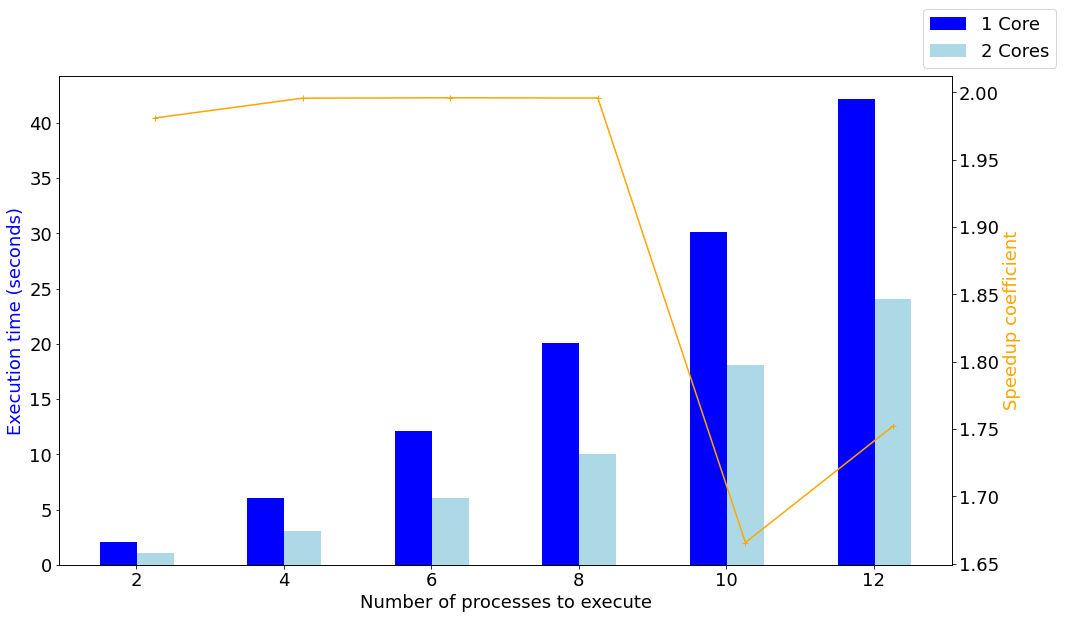

In [41]:
# BARPLOTS
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [16,9]
N = len(numprocesses3)
fig, ax1 = plt.subplots()
y1 = [time1_3, time2_3]
X = np.arange(N)
y2 = speedup3
ax2 = ax1.twinx()
ax1.bar(X+0.0, y1[0], width=0.25, color='blue')
ax1.bar(X+0.25, y1[1], width = 0.25, color='lightblue')
plt.xticks([i+0.12 for i in range(N)], numprocesses3)
fig.legend(labels=['1 Core', '2 Cores'])

ax2.plot(X+0.25, y2, marker="+", color='orange')

ax1.set_xlabel('Number of processes to execute')
ax1.set_ylabel('Execution time (seconds)', color='b')
ax2.set_ylabel('Speedup coefficient', color='orange')

plt.savefig('barplots-and-speedup-sleepfunc2.png')
plt.show()

In [42]:
print(f'The mean speedup time is found to be {statistics.mean(speedup3):.3g} times faster with 2 cores than with 1, and a standard deviation of {statistics.stdev(speedup3):.3g}.')
print(f'The max speedup time is {max(speedup3):.3g} times faster with 2 cores than with 1.')
print(f'The min speedup time is {min(speedup3):.3g} times faster with 2 cores than with 1.')
print(f'The range of the values is {max(speedup3)-min(speedup3):.3g}')

The mean speedup time is found to be 1.9 times faster with 2 cores than with 1, and a standard deviation of 0.149.
The max speedup time is 2 times faster with 2 cores than with 1.
The min speedup time is 1.67 times faster with 2 cores than with 1.
The range of the values is 0.33
